# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [6]:
#install spacy in the current conda environment
!pip install spacy


In [7]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 33.9 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [8]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [9]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [10]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [11]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [12]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [13]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [14]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [15]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [16]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [17]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

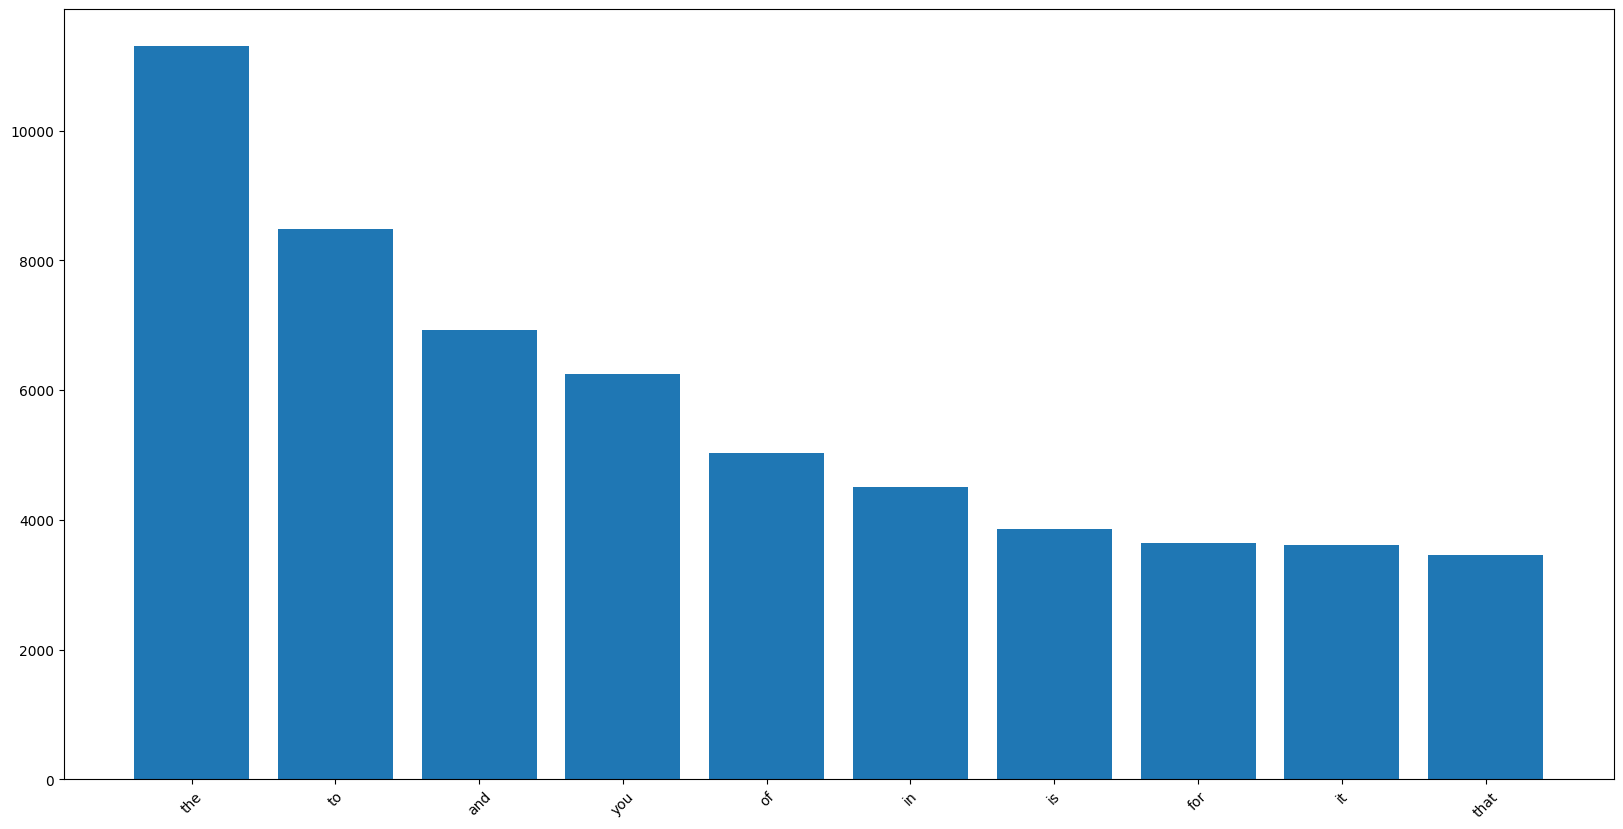

In [19]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: I notice that the majority of words are "the", "to", and "and." The range for these words are anywhere from about 6921 words to 11306 words. Since these words are the most common and used more frequently than the others, this causes the shape of the bar graph to be skewed to the right with no apparent outliers. Since the bar graph is skewed to the right, the mean number for the frequent words in this plot is greater than the median number. 

#### Lemmatization and stopword removal

In [20]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [21]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [22]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [23]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [24]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [25]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

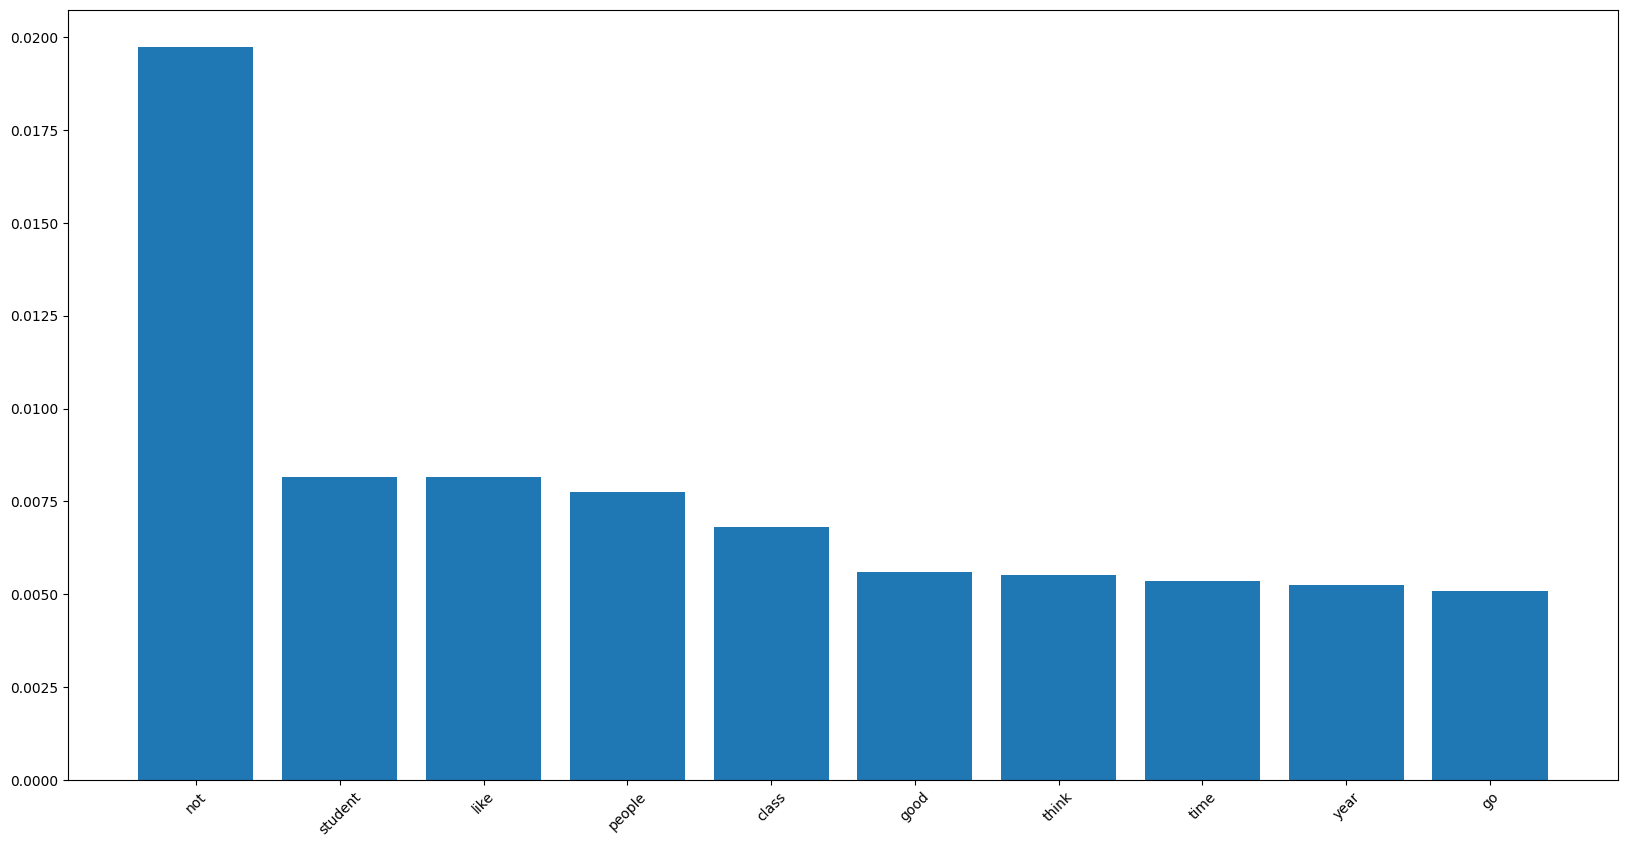

In [26]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [27]:
#pandas allows us to access specific words in the series using the index
word_counts["student"]

0.008162730202101749

In [28]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

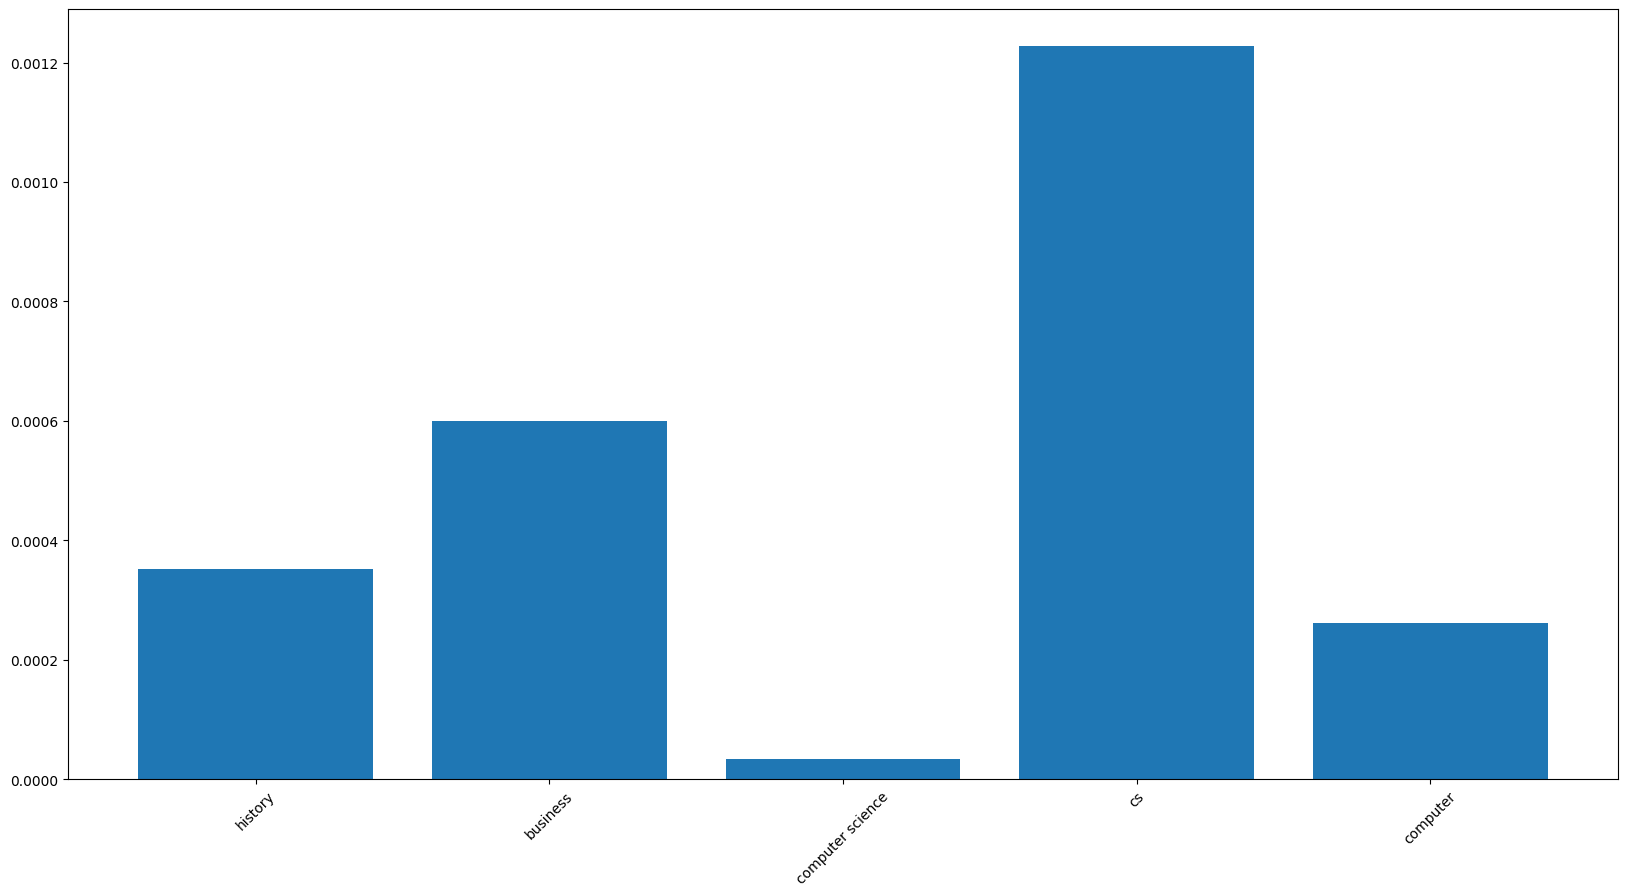

In [29]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [26]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

In [30]:
new_plot_list=word_counts[['art','cs','design','history','engineering']]
new_plot_list

art            0.000124
cs             0.001228
design         0.000352
history        0.000352
engineering    0.000938
dtype: float64

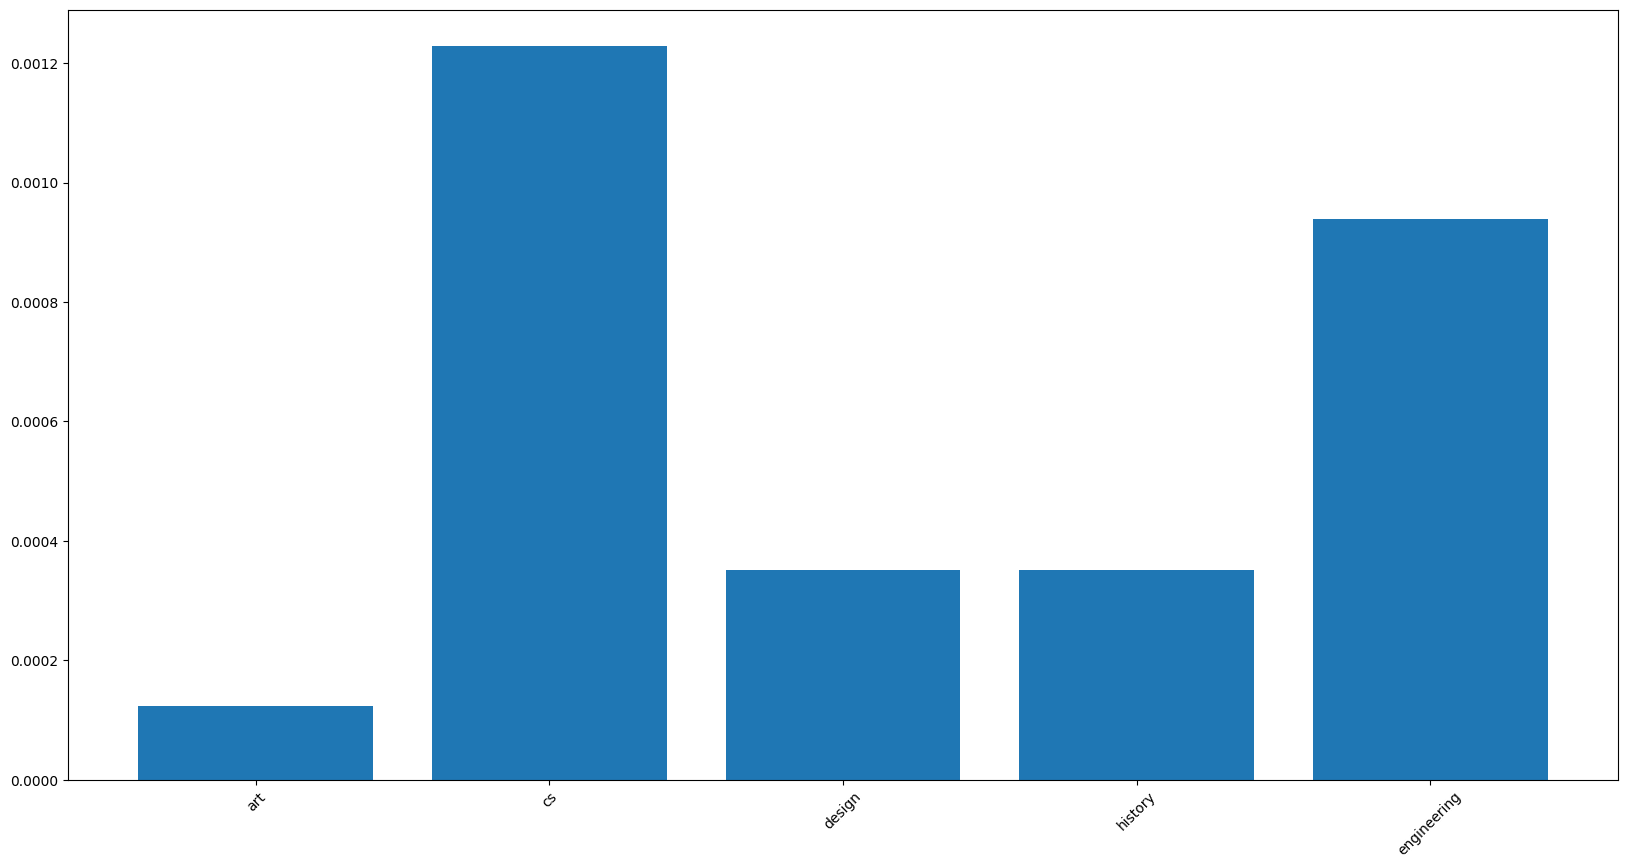

In [31]:
#bar graph excluding stopwords
plt.figure(figsize=(20,10))
plt.bar(new_plot_list.index, new_plot_list.values)
plt.xticks(rotation=45)
plt.show()

### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

In [32]:
uiuc=pd.read_csv("uiuc.csv")
uiuc


,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


In [33]:

uiuc['cleaned_text'] = uiuc['text'].apply(clean) 
vectorizer_uiuc = CountVectorizer()
bag_of_words1 = vectorizer_uiuc.fit_transform(uiuc['cleaned_text']) 
bow_df1 = pd.DataFrame(bag_of_words1.toarray(), columns=vectorizer_uiuc.get_feature_names_out()) 
bow_df1

,aa,aaa,aaaaah,aaabb,ab,abandoned,abcc,abide,abilities,ability,...,zombie,zone,zones,zoo,zoom,zoomed,봉사를,세계로,숭실,진리와
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4723,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


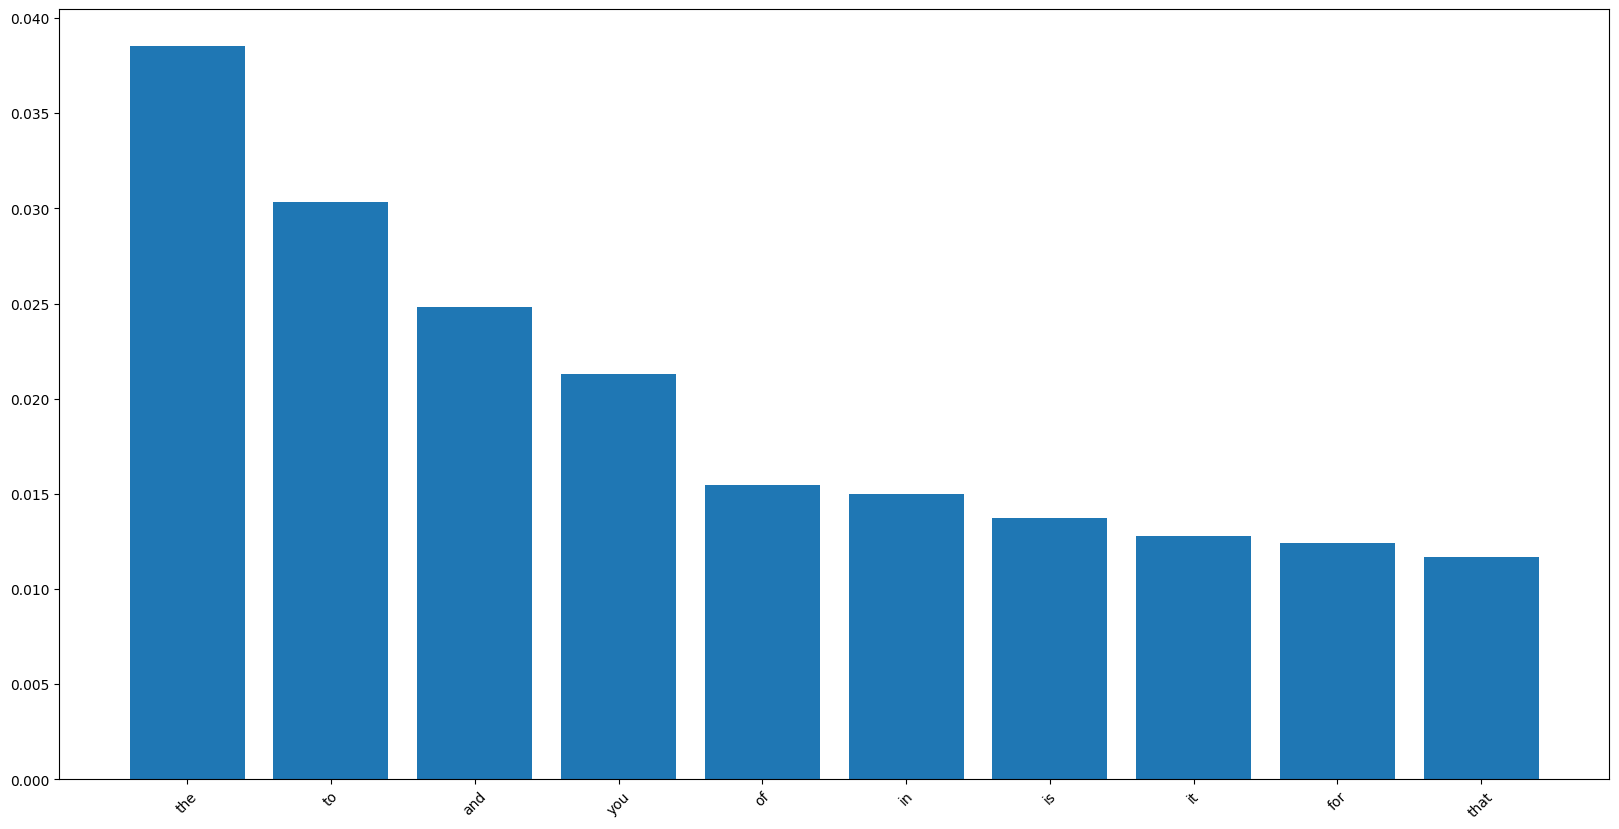

In [34]:
word_counts_uiuc = bow_df1.sum() 
word_counts_uiuc = word_counts_uiuc.sort_values(ascending=False)
word_counts_uiuc = word_counts_uiuc / word_counts_uiuc.sum()
word_counts_uiuc = word_counts_uiuc.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts_uiuc.index, word_counts_uiuc.values)
plt.xticks(rotation=45)
plt.show()

In [35]:
#shows bar graph excluding stopwords
uiuc['lemmatized_text'] = uiuc['cleaned_text'].apply(lemmatize)
vectorizer_uiuc = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words1 = vectorizer_uiuc.fit_transform(uiuc['lemmatized_text']) 
bow_df1 = pd.DataFrame(bag_of_words1.toarray(), columns=vectorizer_uiuc.get_feature_names_out())
word_counts_uiuc = bow_df1.sum()
word_counts_uiuc = word_counts_uiuc.sort_values(ascending=False)
word_counts_uiuc = word_counts_uiuc / word_counts_uiuc.sum()

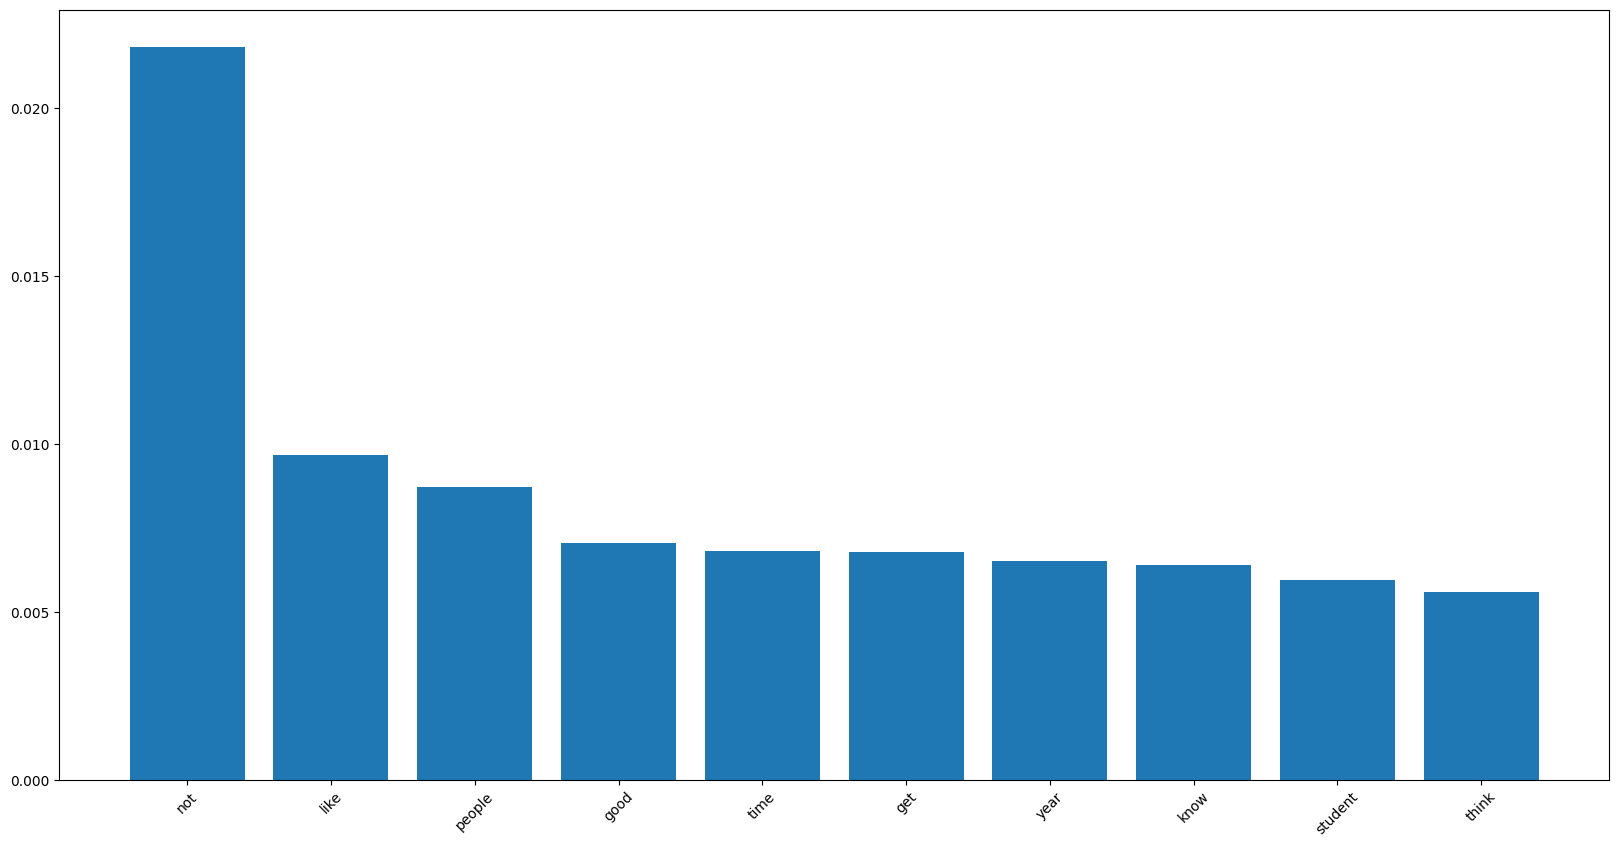

In [36]:
plot_list1 = word_counts_uiuc.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list1.index, plot_list1.values)
plt.xticks(rotation=45)
plt.show()

In [37]:
plot_list1 = word_counts_uiuc[['art','cs','design','history','engineering']]
plot_list1

art            0.000272
cs             0.001413
design         0.000290
history        0.000344
engineering    0.000652
dtype: float64

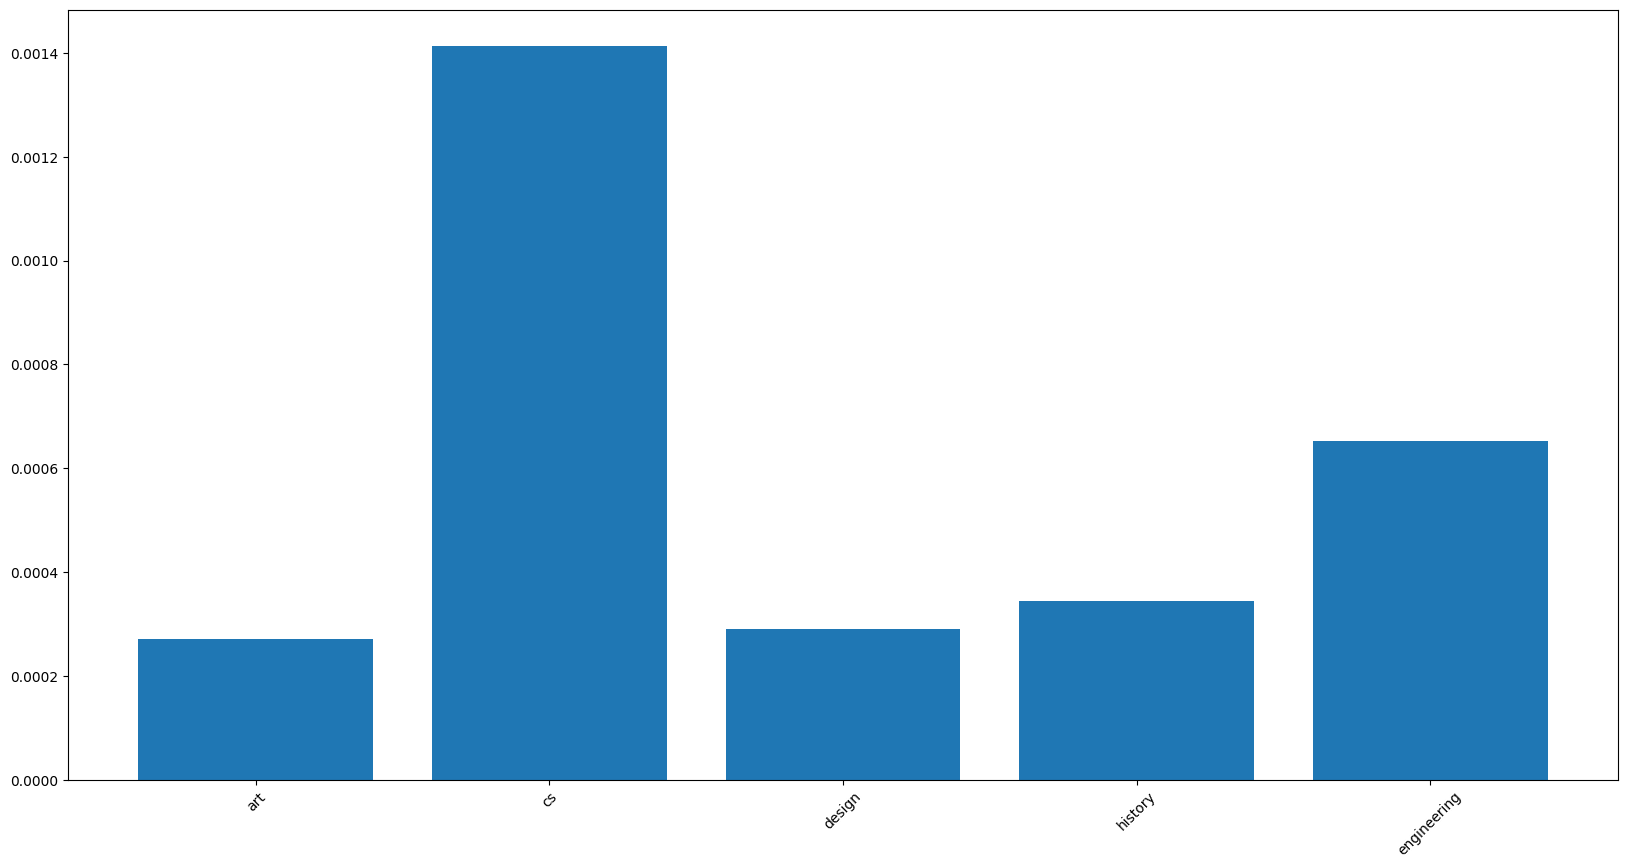

In [38]:
plt.figure(figsize=(20,10))
plt.bar(plot_list1.index, plot_list1.values)
plt.xticks(rotation=45)
plt.show()

When comparing the 5 words between the Michigan and UIUC datasets, I noticed that compared to the Michigan dataset, UIUC has a higher frequency for the words art and cs. On the other hand, Michigan has a higher frequency for words like design, history, and engineering. This is surprising because since UIUC is widely known for their engineering program, I would think that they would have a higher number of people speaking about this than UMich. Additionally, since UMich's CS program is one of the top programs in the country, I thought that they would've had a higher number of students speaking about CS compared to the students at UIUC. Overall, from both results, it's shocking to see the disparities in the number of students from UIUC and UMich talking about the different words that are related to their majors. From these results, I wonder why certain words like art and cs are spoken more at UIUC and why certain words like design, history, and engineering are talked about more at UMich. 

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

In [39]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

In [40]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean) 
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label,cleaned_text,lemmatized_text
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1,have the same professor and in lecture he did ...,professor lecture go to learn stuff ourself re...
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1,do you find it helpful to still go to the lect...,find helpful lecture slide embed mistake make ...
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1,have you tried emailing university housing to ...,try email university housing request access
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1,purchasing illini cash should get you added to...,purchase illini cash add nonresident meal plan...
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1,just did thanks for the suggestion it hadnt oc...,thank suggestion not occur
...,...,...,...,...,...,...,...,...,...
550,550,2024-09-01 14:27:50,0,I have some hearing loss due to not wearing ea...,Zealousideal-Pick799,9,0,i have some hearing loss due to not wearing ea...,hearing loss wear ear protection protect ear g...
238,238,2024-09-03 19:03:18,79,I don't care about genocidal countries being g...,aCellForCitters,5,0,i dont care about genocidal countries being ge...,not care genocidal country genocidal originate...
6850,6850,2024-07-14 14:42:28,0,The registrar is happy to take off any AP cred...,FeatofClay,1,0,the registrar is happy to take off any ap cred...,registrar happy ap credit advise meet advisor ...
493,493,2024-09-02 01:28:43,31,Seizure salad,TwoBits0303,-12,0,seizure salad,seizure salad


In [41]:
#create a bag of words representation with count vectorizer
vectorizer2 = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2)) 
bag_of_words2 = vectorizer2.fit_transform(data['lemmatized_text']) 
bow_df2 = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer2.get_feature_names_out())
word_counts2 = bow_df2.sum()
word_counts2 = word_counts2.sort_values(ascending=False)
word_counts2.head(10)

not        2786
like       1210
people     1149
student     943
good        855
class       826
time        793
year        778
get         765
know        757
dtype: int64

In [42]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = bag_of_words2
y = data['label']

model = LogisticRegression()
model.fit(X, y) 

LogisticRegression()

In [43]:
#report the accuracy of the model
model.score(bag_of_words2, data['label'])

0.9027513227513227

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [44]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
from sklearn.model_selection import train_test_split

# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

model.fit(X_train, y_train)
data_accuracy = model.score(X_test, y_test)
data_accuracy

0.7248677248677249

I notice that the model's accuracy(about 72.45%) is much lower when the training data is not trained on data it's already familiar with. When it's not trained on the entirety of the data set, the model's accuracy seems to be worse. However, the previous model's accuracy of about 90.28% makes sense, and it seems much more reasonable that this has a higher accuracy rate because the training data is for the entire dataset. Additionally, the test data isn't seperated from the training data and when this happens, the accuracy rate lowers because in order to make accurate predictions, the data needs to be trained for the entire dataset. 

#### Part 3: Examine the top features of your model using the following code

In [42]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?


In [45]:
bow_df_coefficients = pd.DataFrame(bag_of_words2.toarray(), columns=vectorizer2.get_feature_names_out())

In [46]:
coefficients = pd.DataFrame({'feature': bow_df_coefficients.columns, 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
pos_top_10 = coefficients.head(10)
neg_top_10 = coefficients.tail(10)

In [47]:
pos_top_10

,feature,coefficient
7612,uiuc,2.384384
6145,rso,2.100142
3254,illini,1.902541
3257,illinois,1.868515
7734,urbana,1.843374
528,basketball,1.778253
2822,grainger,1.771762
28,ac,1.572409
932,champaign,1.543281
1506,danville,1.509338


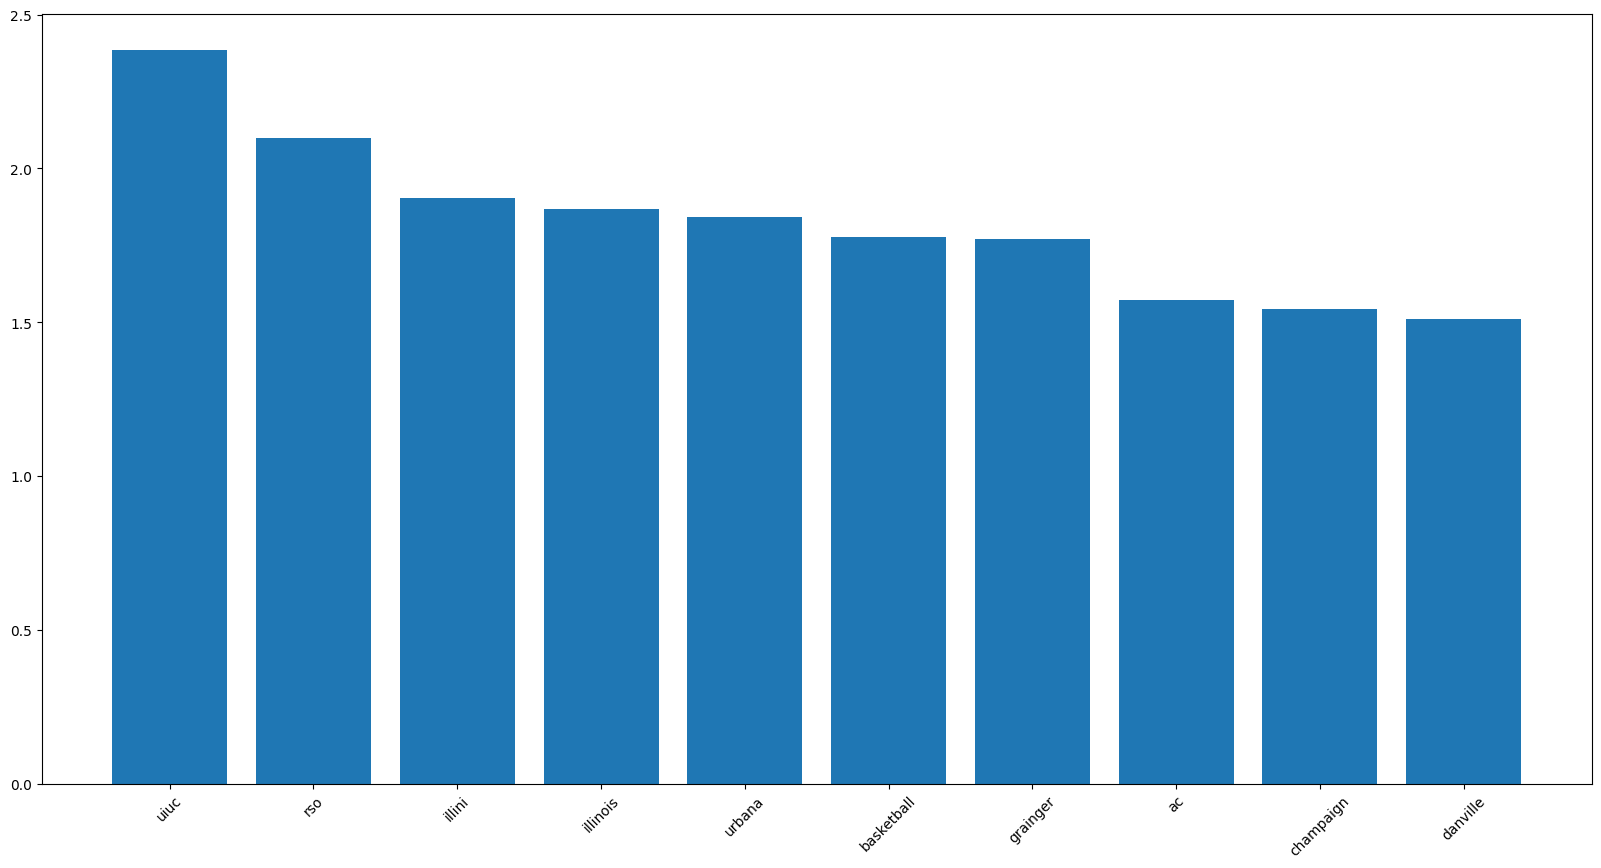

In [48]:
plt.figure(figsize=(20,10))
plt.bar(pos_top_10['feature'], pos_top_10['coefficient'])
plt.xticks(rotation=45)
plt.show()

In [49]:
neg_top_10

,feature,coefficient
1668,diag,-1.662126
2573,gaza,-1.674034
7718,uofm,-1.707892
2473,fresno,-1.870100
4081,lsa,-1.883640
4237,mcard,-2.078458
1918,eec,-2.087819
7618,um,-2.159647
7623,umich,-2.280671
4324,michigan,-2.971208


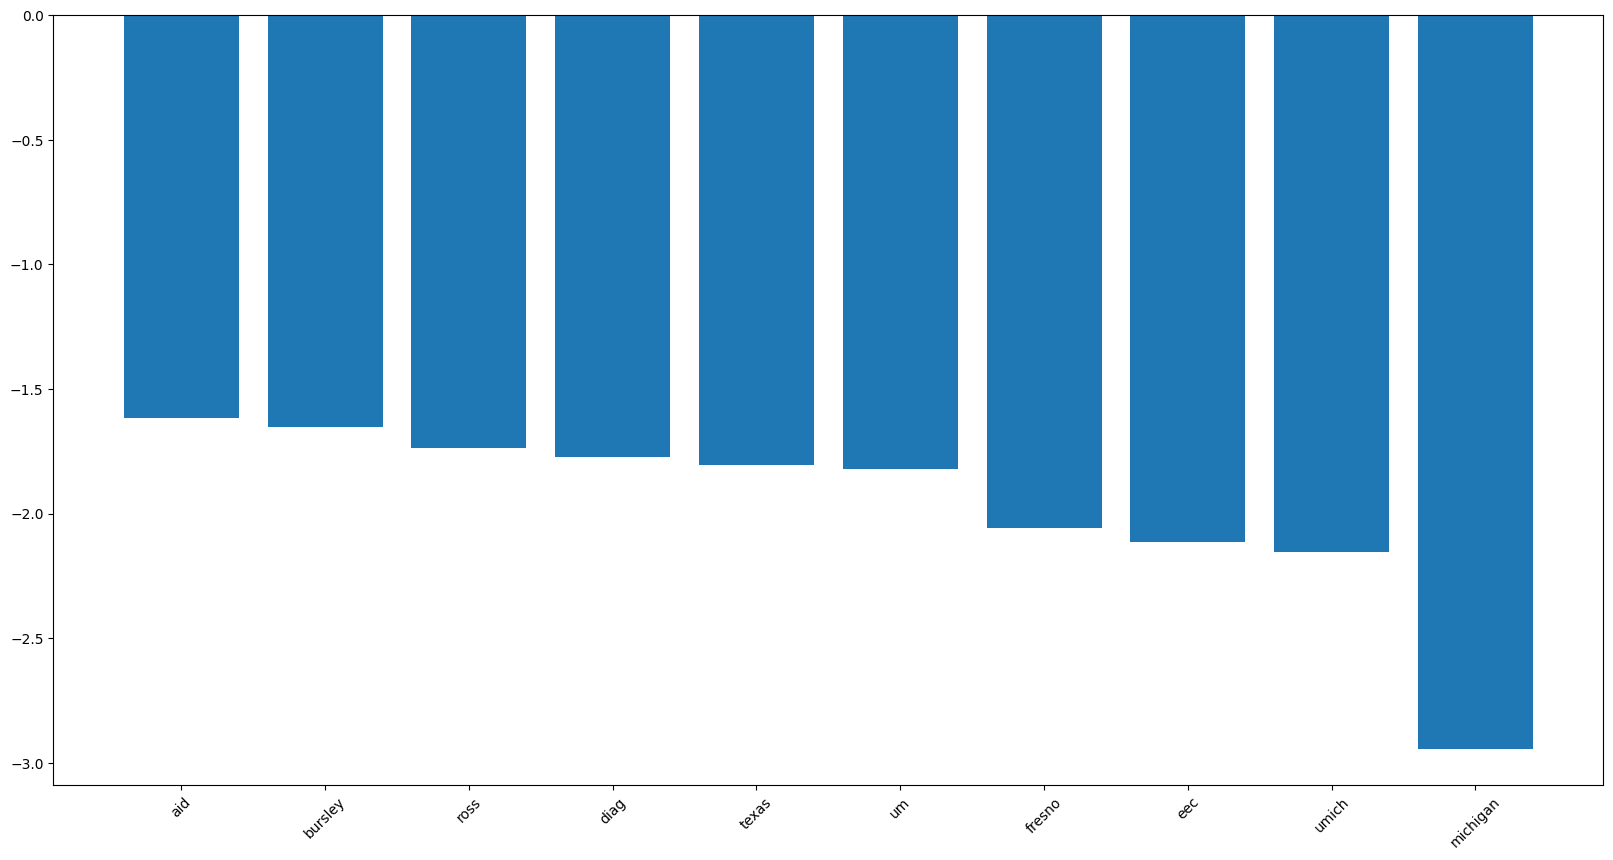

In [53]:
plt.figure(figsize=(20,10))
plt.bar(neg_top_10['feature'], neg_top_10['coefficient'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?

When looking at these words and looking at the bar graphs, it's apparent that UIUC is associated with more positive words while UMICH is associated with negative words. When looking at the coefficients of all the different feautures for the positive words, UIUC has the highest coefficient of about 2.83. On the other hand, UMICh has the highest coefficient for negative words with a coefficient of about -2.97. This just shows how UIUC is associated with more positive words while UMICH is associated with more negative words. 

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [50]:
!pip install gensim

In [51]:
#import libraries
from gensim import corpora
from gensim.models import LdaModel
from gensim.matutils import Sparse2Corpus

In [52]:
corpus = Sparse2Corpus(X, documents_columns=False)
id2word = dict((v, k) for k, v in vectorizer.vocabulary_.items())

In [53]:
corpus

In [113]:
#train LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10)

In [114]:
#print words from LDA model
lda_model.print_topics()

[(0,
  '0.016*"money go" + 0.010*"regard" + 0.009*"capable" + 0.008*"calc semester" + 0.008*"read book" + 0.008*"total" + 0.008*"difficulty" + 0.008*"know campus" + 0.008*"like apartment" + 0.006*"interest"'),
 (1,
  '0.031*"money go" + 0.023*"respect identity" + 0.015*"sum" + 0.015*"interest" + 0.010*"option take" + 0.010*"know campus" + 0.009*"tye" + 0.008*"space campus" + 0.007*"slaughter people" + 0.006*"thing maybe"'),
 (2,
  '0.015*"free palestine" + 0.013*"slaughter people" + 0.008*"money go" + 0.007*"not eat" + 0.007*"happy hour" + 0.006*"program" + 0.006*"garlic" + 0.006*"student ticket" + 0.006*"college engineering" + 0.006*"take semester"'),
 (3,
  '0.017*"option take" + 0.014*"money go" + 0.013*"space campus" + 0.012*"interest" + 0.009*"unacceptable" + 0.008*"michigan difference" + 0.007*"important" + 0.006*"bully" + 0.006*"thing maybe" + 0.005*"grant"'),
 (4,
  '0.029*"money go" + 0.012*"unacceptable" + 0.011*"option take" + 0.010*"know campus" + 0.010*"poster" + 0.008*"ca

In [115]:
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=mich["text"][30]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

Certainly won't make a difference career wise. 99% of people in data science
don't need anything beyond "what is a gradient". If you just want to learn the
material better then sure 285 might have higher teaching quality


In [122]:
lda_model.get_document_topics(corpus[1])

[(0, 0.01000644),
 (1, 0.01000677),
 (2, 0.7447983),
 (3, 0.01000527),
 (4, 0.010008232),
 (5, 0.0100052245),
 (6, 0.0100074345),
 (7, 0.010007521),
 (8, 0.17514926),
 (9, 0.010005526)]

In [117]:
models=lda_model.get_document_topics(corpus, minimum_probability=0)

In [118]:
rows=[]
# Some comments
for i in range(len(models)):
    row=[]
    for m in models[i]:
        row.append(m[1])
    rows.append(row)

topic_df=pd.DataFrame(rows)

In [119]:
topic_df.sort_values(3, ascending=False)

,0,1,2,3,4,5,6,7,8,9
1193,0.002504,0.002504,0.002504,0.977461,0.002504,0.002504,0.002505,0.002504,0.002505,0.002504
222,0.003053,0.003052,0.003052,0.972526,0.003052,0.003052,0.003053,0.003053,0.003053,0.003053
1108,0.004764,0.004764,0.004764,0.957118,0.004764,0.004766,0.004765,0.004765,0.004764,0.004764
1671,0.004783,0.004784,0.004782,0.956957,0.004782,0.004782,0.004783,0.004782,0.004783,0.004782
689,0.005004,0.005004,0.005004,0.954964,0.005004,0.005004,0.005005,0.005004,0.005004,0.005003
...,...,...,...,...,...,...,...,...,...,...
8344,0.856151,0.057860,0.058667,0.000614,0.000614,0.015399,0.000614,0.000614,0.000614,0.008853
8288,0.012464,0.190376,0.031924,0.000586,0.585529,0.042094,0.034335,0.013992,0.050091,0.038608
7787,0.102818,0.263954,0.172077,0.000524,0.129001,0.011074,0.046170,0.088303,0.063401,0.122677
5097,0.223583,0.071126,0.080391,0.000478,0.299239,0.118408,0.091246,0.030963,0.074191,0.010376


In [120]:
#evaluate topic distribution of a review from the bag of words
#print long string without having to scroll
import textwrap

pd.set_option('display.max_colwidth', None)
toprint=mich["text"][570]
wrapped_string = textwrap.fill(toprint, width=80)
print(wrapped_string)

I was never into the sports but loved the academics, the town and the friends
that I met at UM. I think of "Go Blue" encompassing all the school has to offer,
not solely sports. I was at UM only for my degree as well and enjoy meeting
like-minded people.
